In [267]:
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import numpy as np
import os, math
from yahoo_fin import stock_info as si
from stocksymbol import StockSymbol

In [268]:
#Ref: https://medium.datadriveninvestor.com/download-list-of-all-stock-symbols-using-this-python-package-12937073b25
markets = ["us", "kr"]
api_key = 'b854196a-84d1-443d-b6f5-1a3a9ff1d6e5'
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 12, 31)
def make_portfolio(market):
    ss = StockSymbol(api_key)
    tickers = ss.get_symbol_list(market=market, symbols_only=True)
    for ticket_index in range(len(tickers)):
        ticker = tickers[ticker_index]
        if market == "kr":
            ticker = ticker.split('.')[0]
        if market == "us":
            data = web.DataReader(ticker, "av-daily", start=start, end=end, api_key='1LJFAF6FA7C5WBTD')
            # data = web.DataReader(ticker, "stooq", start=start, end=end)
        else:
            data = web.DataReader(ticker, 'naver', start=start, end=end)

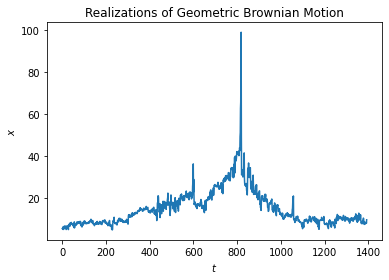

In [259]:
T = int((end-start).total_seconds()//(3600*24))
P = 7 # Predicting period
close_col = None
for col in data.columns:
    if col.lower() == 'close':
        close_col = col
s = np.array([float(v) for v in data[close_col].to_numpy()])
si = np.array([int((dt.datetime.strptime(str(d), '%Y-%m-%d')-start).total_seconds()//(3600*24)) for d in data.index])
sx = [0 for i in range(T)]
for i in range(si[0]):
    sx[i] = s[0]
cur_index = 0
for i in range(si[0], T):
    if cur_index < len(s)-1:
        if i >= si[cur_index] and i < si[cur_index+1]:
            sx[i] = s[cur_index]+(s[cur_index+1]-s[cur_index])*(i-si[cur_index])/(si[cur_index+1]-si[cur_index])
        elif i == si[cur_index+1]:
            sx[i] = s[cur_index+1]
            cur_index += 1
    else:
        sx[i] = s[cur_index]

sigma = [0 for t in range(T)]
mu = [0 for t in range(T)]
# x = [sx[0] for t in range(T)]
for i in range(T // P):
    st = i*P
    fn = min((i+1)*P, T-1)
    log_s = np.log(sx[st:fn])
    log_s = np.array([log_s[i]-log_s[i+1] for i in range(len(log_s)-1)])
    S = np.std(log_s, ddof=1)
    U = np.mean(log_s)
    daily_volatility = S
    daily_drift = U + S*S/2
    for t in range(st+1, fn+1):
        sigma[t] = daily_volatility*math.sqrt(t-st)
        mu[t] = daily_drift*(t-st) - 0.5*daily_volatility**2*(t-st)
        if t < P:
            mu[t] += np.log(sx[0])
        elif t % P == 0:
            mu[t] += np.log(sx[t-1])
        else:
            mu[t] += np.log(sx[t-t%P])
#         x[t] = np.random.lognormal(mu[t], sigma[t])

In [ ]:
# plt.plot(x)
# plt.xlabel("$t$")
# plt.ylabel("$x$")
# plt.title(
#     "Realizations of Geometric Brownian Motion"
# )
# plt.show()

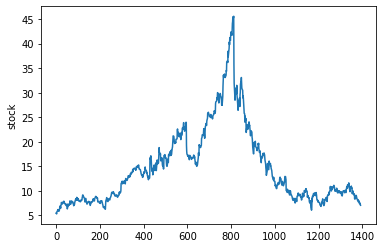

In [260]:
# plt.plot(sx)
# plt.ylabel('stock')
# plt.show()

In [ ]:
config = {}
config_file = open("../config.txt", 'r')
for l in config_file:
    l = l.strip()
    if len(l) > 0 and l[0] != "#":
        key, value = [x.strip() for x in l.split("=")]
        config[key] = value

import psycopg
table_name = market

In [294]:
N = 1000
T = 10000
a = []
j = 0
for i in range(T):
    samples = np.random.uniform(size=N)
    samples = sorted(samples)
    a.append(samples[j])
print(np.mean(a))

0.0009877071598443565
